**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 3

### Assignment Overview: 

This assignment is mainly about the examples in chapters 6 and 7 of the course book with a different data set. Reviewing the book and the corresponding code will help you. **You are expected to primarily use Scikit-Learn in the assignment**.  

**Data Set**: 

**The data set provided for this assignment is the same as the one assigned in the first one. It contains information on many different car types and their prices**. This assignment challenges you to predict the sale price of each car. Data is in CSV format and has already been split into training and test sets for your convenience: train.csv: the training set, test.csv: the test set. 
 

In [50]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

# DATA PREPARATION

Follow the same steps from the first assignment to create the variables **train_x_e, train_y, test_x, and test_y**. 

In [51]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
train = pd.read_csv("training.csv") 
test = pd.read_csv("test.csv")

In [53]:
#divide training.csv into train_x_a and train_y data frames
train_x_a = train.drop('price', axis=1) 
train_y = pd.DataFrame(train.price)

In [54]:
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [55]:
train_y.head(2)

,price
0,15985.0
1,7349.0


In [56]:
train_x_a.shape

(164, 22)

In [57]:
train_y.shape

(164, 1)

In [58]:
#Columns that have missing values
nan_columns = train.columns[train.isnull().any()] 
print(nan_columns)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [59]:
#fill w/ median
train_x_b = train_x_a.fillna(train_x_a.median())

In [60]:
train_x_b.isnull().any()

fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
dtype: bool

In [61]:
#finding nan values indices in column 'price'
null_prices=train_y[train_y['price'].isnull()].index.tolist()
null_prices

[18, 37, 47, 69, 71, 81, 82, 100, 107]

In [62]:
#drop the nan value rows from train_y
train_y = train_y.drop(null_prices)

#drop the nan value rows from train_x_b
train_x_b = train_x_b.drop(null_prices)

In [63]:
train_y.isnull().any()

price    False
dtype: bool

In [64]:
train_x_b.shape 

(155, 22)

In [65]:
#finding all categorical value columns
categorical_columns = list(train_x_b.select_dtypes(include = ['object']))
print(categorical_columns)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [66]:
#Convert categorical value columns into dummy variable columns
train_x_d = pd.get_dummies(train_x_b)

In [67]:
#Scale Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only fit the scaler, not fit_transform. This is so we can use the same scaler for the test data.
scaler.fit(train_x_d)
train_x_e = scaler.transform(train_x_d)
#Array to DataFrame
train_x_e = pd.DataFrame(train_x_e)
train_x_e.columns = train_x_d.columns

In [68]:
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.040486,1.218356,0.697865,1.106358,-0.204044,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,-0.315104,-0.080582,1.146051,-0.248282
1,-0.729389,-0.266100,-1.003614,-0.087277,-0.969288,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,-0.080582,-0.080582,-0.114332,-0.248282,1.387274,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282


In [69]:
#divide test.csv into test_x and test_y data frames
test_x = test.drop(columns = 'price')
test_y = test['price']

In [70]:
#Columns that have missing values
nan_columns = test_x.columns[test_x.isnull().any()]
print(nan_columns)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='object')


In [71]:
#filling missing values with median
test_x.fillna(train_x_a.median(), inplace = True)

In [72]:
test_x.isnull().any()

fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
dtype: bool

In [73]:
#finding nan values indices in column 'price'
null_prices=test_y[test_y.isnull()].index.tolist()
null_prices

[10]

In [74]:
#drop the nan value rows from test_y
test_y=test_y.drop(null_prices)

#drop the nan value rows from test_x
test_x=test_x.drop(null_prices)

In [75]:
test_x.shape

(40, 22)

In [76]:
#Convert categorical value columns into dummy variable columns
test_x = pd.get_dummies(test_x)
test_x.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,...,0,0,0,0,0,0,0,0,1,0
1,96.5,175.4,62.5,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,...,0,0,0,1,0,0,0,0,0,0


In [77]:
from sklearn.preprocessing import StandardScaler
 
# Use already fitted standard scaler from training data.
test_x = scaler.transform(test_x)
# Array to Data frame
test_x = pd.DataFrame(test_x)
test_x.columns = train_x_d.columns
test_x.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.311385,1.529613,2.799691,0.885315,0.874435,0.301750,-0.471250,0.473955,-0.384726,0.204338,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,-0.315104,-0.080582,1.146051,-0.248282
1,-0.368190,0.148909,-1.654180,0.177976,-0.279379,-0.352393,-0.628165,1.029791,-0.250249,-0.447582,...,-0.080582,-0.080582,-0.114332,4.027682,-0.720838,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282


## KNN REGGRESSOR TO PREDICT CAR PRICES 

In this part of the assignment, you are going to train a KNN Regression model that predicts the prices of cars by using the other features in the dataset. 

### a) Training Vs Validation Plot:

Split your training dataset (**train_x_e and train_y**) into a validation and new training set (**80% training and 20% validation**, use **random_state = 0** with sklearn’s train_test_split). For every integer value **k between 1 and 30** create and record a KNN Regression model’s **training** and **validation** MSEs where the KNN model’s number of neighbours is k. Produce a plot that visualizes both your training and validation errors over the differing values of k: where the y-axis is the error and the x-axis is k. 

In [78]:
#Split training dataset into new training and validation set
train_split_x, val_split_x, train_split_y, val_split_y = train_test_split(train_x_e, train_y, test_size=0.2, random_state=0)

In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 

knn_training_errors = []
knn_validation_error = []
#Creating KNN Regression for every k between range(1, 30)
for k in range(1, 30): 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_split_x, train_split_y)
    train_pred = knn.predict(train_split_x)
    val_pred = knn.predict(val_split_x)
    train_error = mean_squared_error(train_split_y, train_pred)
    validation_error = mean_squared_error(val_split_y, val_pred)
    
    knn_training_errors.append(train_error)
    knn_validation_error.append(validation_error)

Text(0, 0.5, 'MSE')

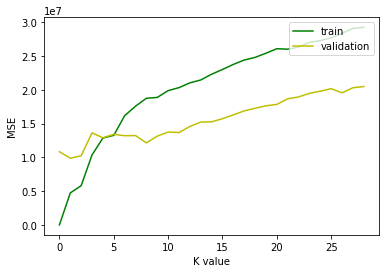

In [80]:
# training vs validation plot
plt.plot(knn_training_errors, 'g-', label = 'train')
plt.plot(knn_validation_error, 'y-', label = 'validation')
plt.legend(loc='upper right')
plt.xlabel('K value')
plt.ylabel('MSE')

### b) Test your model:

For the best k you found in (a), recreate your best model as best_knn and report it’s test MSE on the test set. 

In [81]:
#recreating KNN regression model with best k value
best_knn = KNeighborsRegressor(n_neighbors=5)
best_knn.fit(train_split_x, train_split_y)
print(best_knn)

KNeighborsRegressor()


In [82]:
knn_preds = best_knn.predict(val_split_x)
print(knn_preds)

[[14421. ]
 [10992.6]
 [ 7324.1]
 [ 8202.8]
 [ 6959. ]
 [ 8996. ]
 [ 8015.4]
 [16746. ]
 [ 7800. ]
 [ 7947.6]
 [ 9300.6]
 [ 7339.4]
 [17351. ]
 [14923. ]
 [ 7944.6]
 [11669.4]
 [16977.4]
 [ 7010.2]
 [11511. ]
 [ 7339.4]
 [12316. ]
 [25572. ]
 [ 7076.4]
 [10992.6]
 [ 6346. ]
 [26181. ]
 [ 9015. ]
 [ 6678.8]
 [ 7163.3]
 [19753.6]
 [11957.2]]


In [83]:
knn_mse = mean_squared_error(val_split_y, knn_preds)
print(knn_mse)

12896092.82136416


## DECISION TREE REGRESSOR TO PREDICT CAR PRICES

In this part of the assignment, you are going to train a Decision Tree Regression model that predicts the prices of cars by using the other features in the dataset. When asked to retrieve the MSE score from GridSearchCV, set the scoring option to ‘neg_mean_square_error’. This will return a negative error. **To obtain MSE, get the absolute value**. 

### c) Grid Search to find best model:

As decision trees have large hyper parameter sets, you will be using gridsearch to find the best combinations. Using the below parameters, run GridSearchCV (cv = 5) with a Decision Tree model on **train_x_e** and **train_y**. Print out the best model’s parameters and error. **Make sure you set random_state to 0**. 

<img src="image.png">

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

parameters = {'max_depth': [None, 1, 5, 10], 'min_samples_split': [0.01, 0.05, 0.1, 0.3 ], 'max_features': ['auto', 'sqrt', 'log2' ], 'max_leaf_nodes': [10, 50, 100, 250 ],'random_state':[0]}
       

decision_tree_grid = DecisionTreeRegressor(random_state =0)
grid_search = GridSearchCV(decision_tree_grid, parameters, cv=5, scoring = 'neg_mean_squared_error')
grid_search.fit(train_x_e, train_y)

#findiing best parameters and mse
best_gs = grid_search.best_params_
print(best_gs)
gs_mse = abs(grid_search.best_score_)
print(gs_mse)

{'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 50, 'min_samples_split': 0.1, 'random_state': 0}
11321462.259990446


### d) Test your model:

Recreate your best Decision Tree model from (c) as best_tree and report it’s test MSE on the test set. 

In [85]:
#recreating best decision tree regression model with best parameters
best_tree = DecisionTreeRegressor(max_depth= None, max_features ='auto', max_leaf_nodes= 50, min_samples_split =0.1, random_state =0)
best_tree.fit(train_x_e,train_y)
print(best_tree)

DecisionTreeRegressor(max_features='auto', max_leaf_nodes=50,
                      min_samples_split=0.1, random_state=0)


In [86]:
tree_preds = best_tree.predict(test_x)
print(tree_preds)

[20038.28571429 11007.93333333 35338.27272727 35338.27272727
 35338.27272727 13900.46153846 35338.27272727 18285.1945
 35338.27272727 11007.93333333 15291.4         6807.33333333
  8279.26666667  6807.33333333 13900.46153846 13900.46153846
 15291.4        11007.93333333 13900.46153846  8279.26666667
  8039.45454545 11994.75       11994.75       13900.46153846
 15291.4        22713.33333333  8279.26666667  8039.45454545
  8039.45454545  8279.26666667  8039.45454545 35338.27272727
 35338.27272727  8279.26666667  7442.15384615  8279.26666667
 11007.93333333 15291.4         6672.85714286 20038.28571429]


In [87]:
tree_mse = mean_squared_error(test_y, tree_preds )
print(tree_mse)

9779323.383824795


## ENSEMBLE BAGGING REGRESSOR TO PREDICT CAR PRICES

In this part of the assignment, you are going to train a bagging ensemble model that predicts the prices of cars by using the other features in the dataset. When asked to retrieve the MSE score from GridSearchCV, set the scoring option to ‘neg_mean_square_error’. This will return a negative error. **To obtain MSE, get the absolute value**. 

### e) Grid Search to find best model:

In order to utilize bagging ensembling in sklearn you will be working with sklearn.ensemble.BaggingRegressor. Using the below parameters, run GridSearchCV (cv = 5) on **train_x_e** and **train_y**. Print out the best model’s parameters and error. **Make sure you set random_state to 0**. 

<img src="image1.png">

In [88]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression

parameters = {'base_estimator':[LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(random_state=0)],'n_estimators': [25, 50, 100, 250], 'bootstrap_features': [False, True], 'random_state':[0]}
             
bag_grid = BaggingRegressor(random_state =0)
grid_search = GridSearchCV(bag_grid, parameters, cv=5, scoring = 'neg_mean_squared_error')
grid_search.fit(train_x_e, train_y)

#findiing best parameters and mse
best_gs = grid_search.best_params_
print(best_gs)
gs_mse = abs(grid_search.best_score_)
print(gs_mse)


{'base_estimator': DecisionTreeRegressor(random_state=0), 'bootstrap_features': True, 'n_estimators': 100, 'random_state': 0}
8316074.607935673


### f) Test your model:

Recreate your best Ensemble Bagging model from (e) as best_bag and report it’s test MSE on the test set. 

In [89]:
#recreating model with best parameters
best_bag = BaggingRegressor(base_estimator = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best'), bootstrap_features =True, n_estimators=100, random_state = 0)
best_bag.fit(train_x_e,train_y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(presort=False,
                                                      random_state=0),
                 bootstrap_features=True, n_estimators=100, random_state=0)

In [90]:
bag_preds = best_bag.predict(test_x)
print(bag_preds)

[17692.69167     9051.245      30240.53       33940.89
 31578.28       12107.18       37425.45       16545.21668
 26844.38333333 14910.66333333 14478.63        7410.28833333
  8397.505       6695.94       11051.63       11021.31
 16742.49500333 14842.94333333 16304.12333333  7951.95
  9291.135      16079.39334    12043.24167    11843.51666667
 16925.52668    19332.17        7811.062       8175.86
  8002.1         8016.32666667  8476.26       30116.17
 35113.76        7961.18        7524.5275      8469.19666667
 10770.9        14135.83        6430.90116667 18939.41167   ]


In [91]:
bag_mse = mean_squared_error(test_y, bag_preds)
print(bag_mse)

3964934.9923920305


## RANDOM FOREST REGRESSOR TO PREDICT CAR PRICES

In this part of the assignment, you are going to train a random forest model that predicts the prices of cars by using the other features in the dataset. When asked to retrieve the MSE score from GridSearchCV, set the scoring option to ‘neg_mean_square_error’. This will return a negative error. **To obtain MSE, get the absolute value**.

### g) Grid Search to find best model:

In order to utilize random forests in sklearn  you will be working with sklearn.ensemble.RandomForestRegressor. Using the below parameters, run GridSearchCV (cv = 5) with a Random Forest model on **train_x_e** and **train_y**. Print out the best model’s parameters and error. **Make sure you set random_state to 0**. 

<img src="image2.png">

In [92]:
from sklearn.ensemble import RandomForestRegressor
parameters = {'n_estimators':[25, 50, 100, 250],'max_depth': [None, 1, 5, 10], 'random_state':[0]}
             
random_forest_grid = RandomForestRegressor(random_state =0)
grid_search = GridSearchCV(random_forest_grid, parameters, cv=5, scoring = 'neg_mean_squared_error')
grid_search.fit(train_x_e, train_y)


best_gs = grid_search.best_params_
print(best_gs)
gs_mse = abs(grid_search.best_score_)
print(gs_mse)


{'max_depth': None, 'n_estimators': 250, 'random_state': 0}
8868912.73859477


### h) Test your model:

Recreate your best Random Forest model from (g) as best_rf and report it’s test MSE on the test set. 

In [93]:
best_random_forest = RandomForestRegressor(max_depth= None, n_estimators= 250, random_state= 0)
best_random_forest.fit(train_x_e,train_y)

RandomForestRegressor(n_estimators=250, random_state=0)

In [94]:
random_forest_preds = best_random_forest.predict(test_x)

In [95]:
random_forest_mse = mean_squared_error(test_y, random_forest_preds)
print(random_forest_mse)

4834633.740202937


### i) Feature Importances:

Print out the three most important features according to your best model.

In [96]:
importances = best_random_forest.feature_importances_

In [97]:
#sorting features indices from the most to the least according to their importance
indices = np.argsort(importances)[::-1]
indices

array([ 5,  4, 12,  9,  2, 11,  1,  0,  7,  6, 10,  8,  3, 47, 18, 17, 25,
       26, 20, 43, 15, 22, 31, 38, 16, 37, 21, 23, 33, 19, 35, 13, 29, 45,
       36, 32, 24, 30, 48, 14, 28, 44, 34, 42, 27, 46, 41, 39, 40],
      dtype=int64)

In [98]:
#finding three most important features
train_x_e.columns[(indices)][0:3]

Index(['enginesize', 'curbweight', 'highwaympg'], dtype='object')